In [1]:
from pytrends.request import TrendReq
import pandas as pd

In [2]:
pytrends = TrendReq(hl='ko', tz=540)

In [3]:
keywords = '금융'

In [4]:
pytrends.build_payload(kw_list = [keywords], cat=0, timeframe="today 5-y", geo="KR", gprop="")

### 산업 관련 검색어(related_queries)

In [5]:
# Get the Related Queries
data_queries = pytrends.related_queries()
data_queries = data_queries['금융']['top']

In [6]:
for i in range(len(data_queries)):
    data_queries['query'][i] = data_queries['query'][i].replace(" ", "")

C:\Users\IBK\AppData\Local\Temp\ipykernel_21668\546437538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_queries['query'][i] = data_queries['query'][i].replace(" ", "")


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
freq = dict(zip(data_queries["query"], data_queries["value"]))

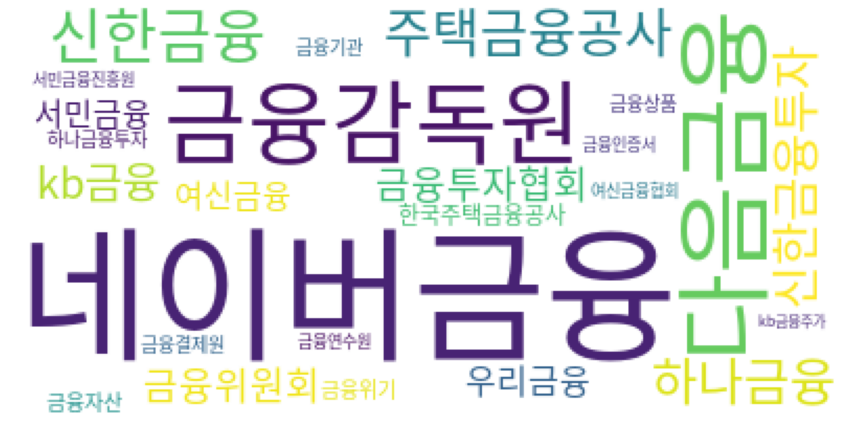

In [9]:
wordcloud = WordCloud(font_path = "C:/Django/Data_Processing/Fonts/NotoSansKR-Regular.otf", background_color="white")

word = plt.figure( figsize=(15,10))
word = plt.imshow(wordcloud.generate_from_frequencies(freq))
word = plt.axis("off")
word = plt.savefig('C:/Django/Data_Processing/Data/cloud_%s.png' % keywords)

### 산업 관심도 추이(interest over time)

In [10]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [11]:
data = pytrends.interest_over_time()

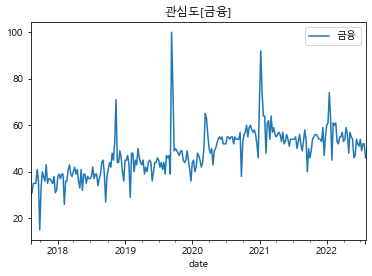

In [12]:
image = data.plot(title = '관심도[%s]' % keywords)
fig = image.get_figure()
fig.savefig('C:/Django/Data_Processing/Data/interest_%s.png' % keywords)